In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import plotly.express as px
import plotly.io as pio
import seaborn as sns

In [2]:
df = pd.read_csv("/datasets/games.csv")  
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


# Preparing the Data

**convert the column names to lowercase**

In [4]:
df.columns = df.columns.str.lower()

In [5]:
df.tail()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


**Convert the data to the required type**

**(Year_of_Release) was initially a (float64) representing years. conversion to a (int64) format, and drop missing values completely because we don’t want to assume, the year was extracted use for easier analysis**

In [6]:
df = df.dropna(subset=['year_of_release'])  # Remove missing values
df['year_of_release'] = df['year_of_release'].astype(int)

**User_Score was initially an object because it contained string representations of numbers and non-numeric values like 'tbd' and 'N/A', it was converted to float64. The invalid entries were replaced with NaN due to the errors='coerce' option**

In [7]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

In [8]:
df.info()
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


**Handling missing values**

In [9]:
#df.isna().sum()
df.isnull().sum()/len(df)

name               0.000122
platform           0.000000
year_of_release    0.000000
genre              0.000122
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.514593
user_score         0.546212
rating             0.406056
dtype: float64

**For columns like (user_score), (critic_score), or (rating), replace tbd with NaN to maintain data integrity.**

In [10]:
df['user_score'] = df['user_score'].replace('tbd', float('nan'))
df['critic_score'] = df['critic_score'].replace('tbd', float('nan'))
df['rating'] = df['rating'].replace('tbd', 'Not Rated')


**for column (name) has 2 missing values , its better to drop the because the data unecessary**

In [11]:
df_missing_names = df[df['name'].isnull()]
df_missing_names

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [12]:
df = df.dropna(subset=['name'])

In [13]:
df['name'].isnull().sum()

0

**(year_of_release) has missing values, it might be better to drop rows with missing years to maintain data integrity.**

In [14]:
df_missing_year = df[df['year_of_release'].isnull()]
df_missing_year

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [15]:
df = df.dropna(subset=['year_of_release'])

In [16]:
df['year_of_release'].isnull().sum()

0

**(critic_score) has missing values, we could fill missing values with the median of the existing critic scores**

In [17]:
df_missing_critic_score = df[df['critic_score'].isnull()]

In [18]:
df_missing_critic_score.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


In [19]:
df['critic_score'] = pd.to_numeric(df['critic_score'], errors='coerce')
#df['critic_score'] = pd.to_numeric(df['critic_score'], errors='coerce')

In [20]:
df['critic_score'].isnull().sum()

8461

In [21]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**(user_score) has missing values, Similar to critic_score, we could fill missing user scores with the median user score**

In [22]:
df_missing_user_score = df[df['user_score'].isnull()]
df_missing_user_score.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


In [23]:
#df['user_score'].fillna(df['user_score'].median(), inplace=True)
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

In [24]:
df['user_score'].isnull().sum()

8981

In [25]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**(rating) has missing values, we can fill missing ratings with a placeholder like "Not Rated"**

In [26]:
df_missing_rating = df[df['rating'].isnull()]
df_missing_rating.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


In [27]:
df['rating'].fillna('unknown', inplace=True)

In [28]:
df['rating'].isnull().sum()

0

In [29]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown


In [30]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

**Calculate the total sales**

In [31]:
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

# Analyze the data

**Check Game Releases Over Time**

**Count number of games per year**

In [32]:
games_per_year = df['year_of_release'].value_counts().sort_index()

**Plot the results**

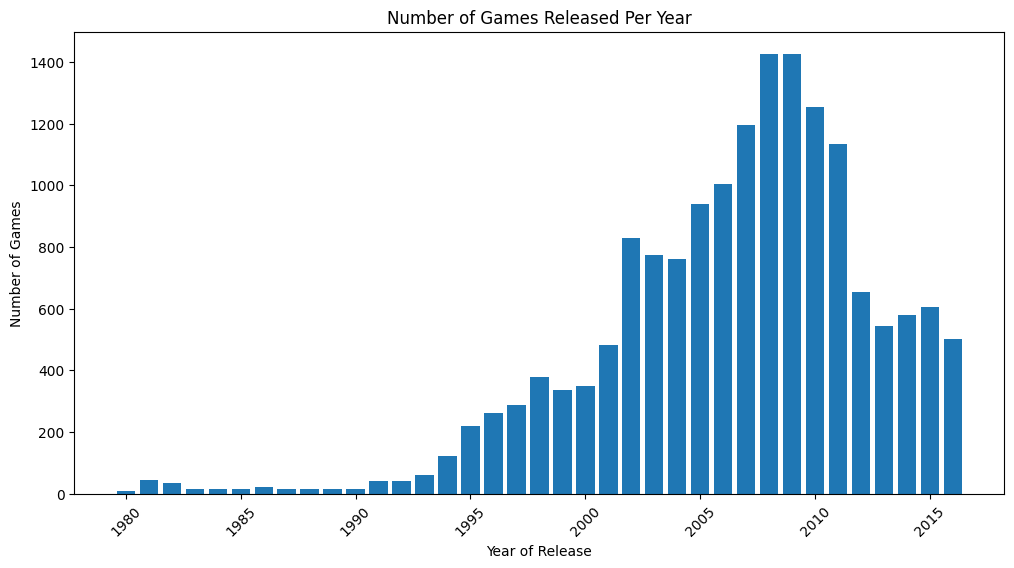

In [33]:
plt.figure(figsize=(12, 6))
plt.bar(games_per_year.index, games_per_year.values)
plt.xlabel('Year of Release')
plt.ylabel('Number of Games')
plt.title('Number of Games Released Per Year')
plt.xticks(rotation=45)
plt.show()

**Growth Phase (1980 - Early 2000s) Game releases started small in the 1980s. Rapid growth began in the 1990s, with releases peaking in 2008 over 1,400 games. The 2000s were the golden years, with consistent growth.After 2008, game releases steadily declined. By 2012, the number of releases had dropped significantly. The downward trend continued into 2016 below 600 games**



**Analyze Sales Across Platforms**

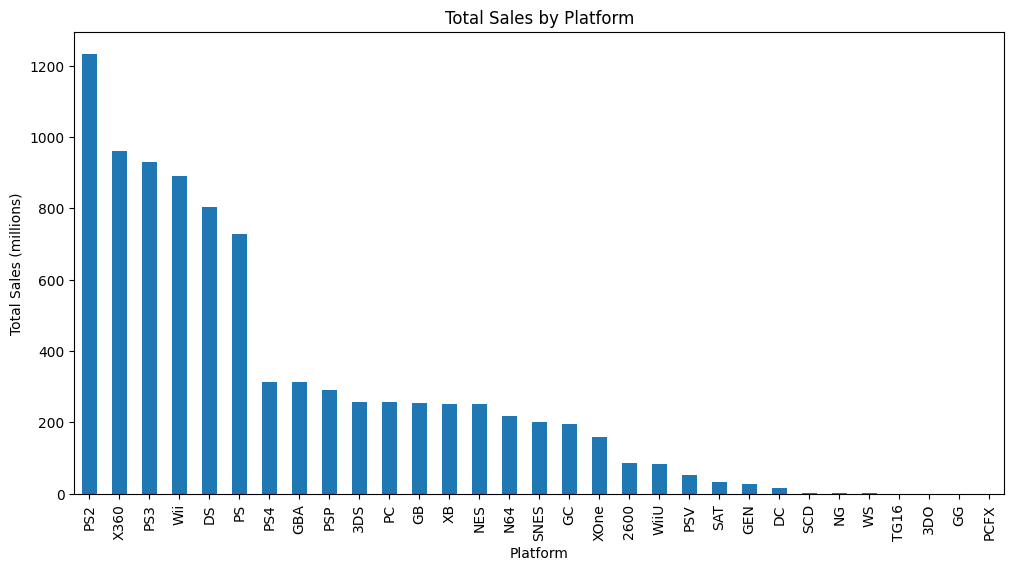

In [34]:
# Sum total sales per platform
platform_sales = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Plot the results
plt.figure(figsize=(12, 6))
platform_sales.plot(kind='bar')
plt.xlabel('Platform')
plt.ylabel('Total Sales (millions)')
plt.title('Total Sales by Platform')
plt.show()

<Figure size 1500x600 with 0 Axes>

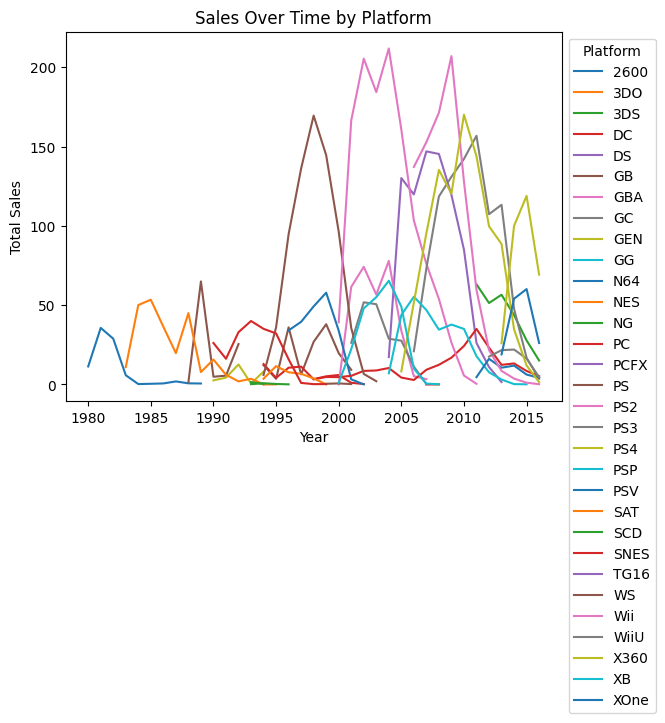

In [35]:
# Group by platform and year
platform_lifespan = df.groupby(['platform', 'year_of_release'])['total_sales'].sum().unstack()

plt.figure(figsize=(15, 6))
platform_lifespan.T.plot()
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Sales Over Time by Platform')
plt.legend(title='Platform', bbox_to_anchor=(1, 1))
plt.show()

**(PS2) leads with over 1200M in total sales, making it the most successful platform in this dataset.
Strong Performance from X360, PS3, Wii, and DS – These platforms each have over 800M in total sales, showing their importance in the gaming market.
And (NES, SNES, N64, GB, GBA, XB) Still Performed Well – Despite their age, older platforms like NES about (250M) and SNES about(200M) still show notable lifetime sales.
PC Sales Are Relatively Low its below (300M) PC game sales seem lower in this dataset, possibly due to the influence of digital sales that may not be fully captured.
(PS4, XOne, WiiU) Have Lower Totals 
(TG16, 3DO, PCFX) Have Almost No Sales – These niche platforms struggled, with sales under 0.2M.**

**Choose a period that will help predict sales for 2017.
If data before a certain year becomes less relevant, remove it**

In [36]:
df_recent_year = df[(df['year_of_release'] >= 2013)&(df['year_of_release'] <= 2016)]

In [37]:
df_recent_year

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01


**Find the most successful and growing platforms**

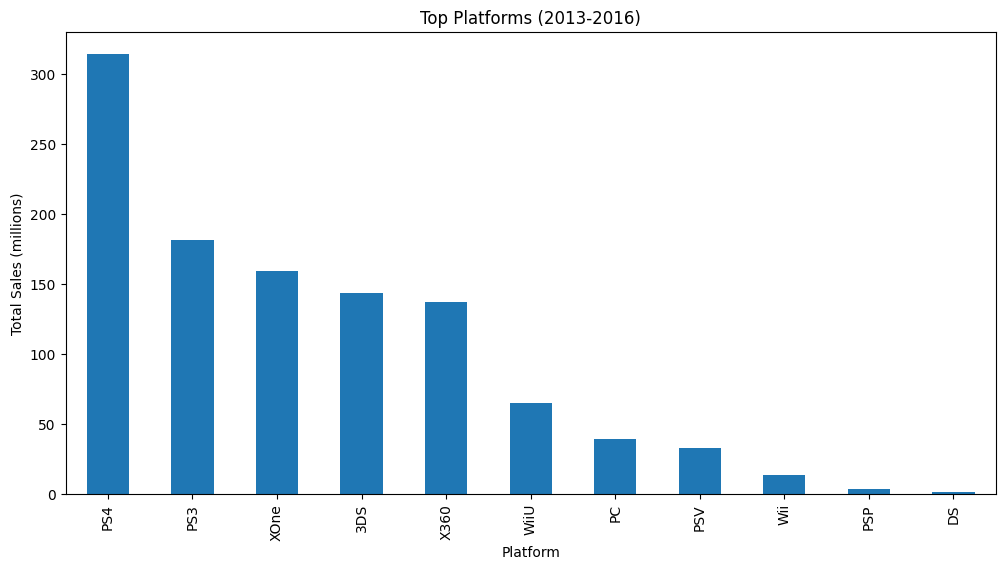

In [38]:
# Find platforms with highest sales in the most recent years
recent_sales = df_recent_year[df_recent_year['year_of_release'] >= 2013].groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Plot results
plt.figure(figsize=(12, 6))
recent_sales.plot(kind='bar')
plt.xlabel('Platform')
plt.ylabel('Total Sales (millions)')
plt.title('Top Platforms (2013-2016)')
plt.show()

The data shows that PS4 leads the market with the highest total sales over (300M), followed by PS3 over (150M) and XOne about (150M). This indicates PlayStation’s continued dominance in the console market. The 3DS below (150M) remains the strongest handheld, while the PSV below (50M) and PSP below (5M) highlight the decline of handheld gaming, likely due to the rise of mobile games.

The Wii below (25M) and WiiU below (75M) show significantly lower sales, reinforcing Nintendo’s shift toward the Switch. Meanwhile, PC gaming below (50M) appears to have lower sales, possibly because digital sales from platforms like Steam are underrepresented in the dataset.

These insights suggest that modern gaming trends favor PlayStation and Xbox consoles, while handheld and older platforms are seeing a decline.

In [39]:
recent_sales

platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
WiiU     64.63
PC       39.43
PSV      32.99
Wii      13.66
PSP       3.50
DS        1.54
Name: total_sales, dtype: float64

 **Box Plot for Sales by Platform**

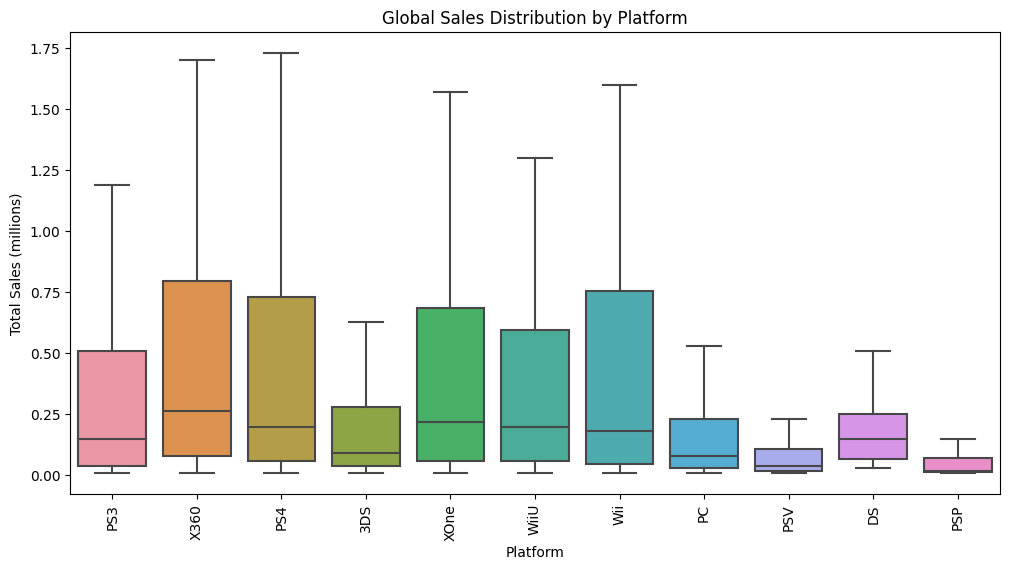

In [40]:

plt.figure(figsize=(12, 6))
sns.boxplot(x='platform', y='total_sales', data=df_recent_year, showfliers=False)
plt.xticks(rotation=90)
plt.xlabel('Platform')
plt.ylabel('Total Sales (millions)')
plt.title('Global Sales Distribution by Platform')
plt.show()

**Correlation Between Reviews and Sales See if critic and user reviews impact sales**

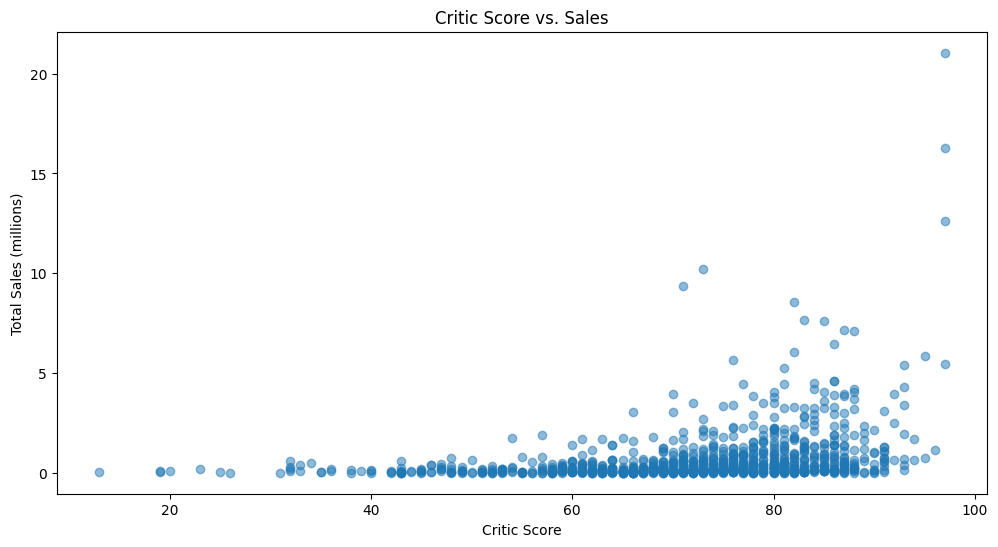

              critic_score  total_sales
critic_score        1.0000       0.3137
total_sales         0.3137       1.0000


In [41]:
# Scatter plot for critic score vs. sales
plt.figure(figsize=(12, 6))
plt.scatter(df_recent_year['critic_score'], df_recent_year['total_sales'], alpha=0.5)
plt.xlabel('Critic Score')
plt.ylabel('Total Sales (millions)')
plt.title('Critic Score vs. Sales')
plt.show()

# Correlation
correlation_critic = df_recent_year[['critic_score', 'total_sales']].corr()
print(correlation_critic)

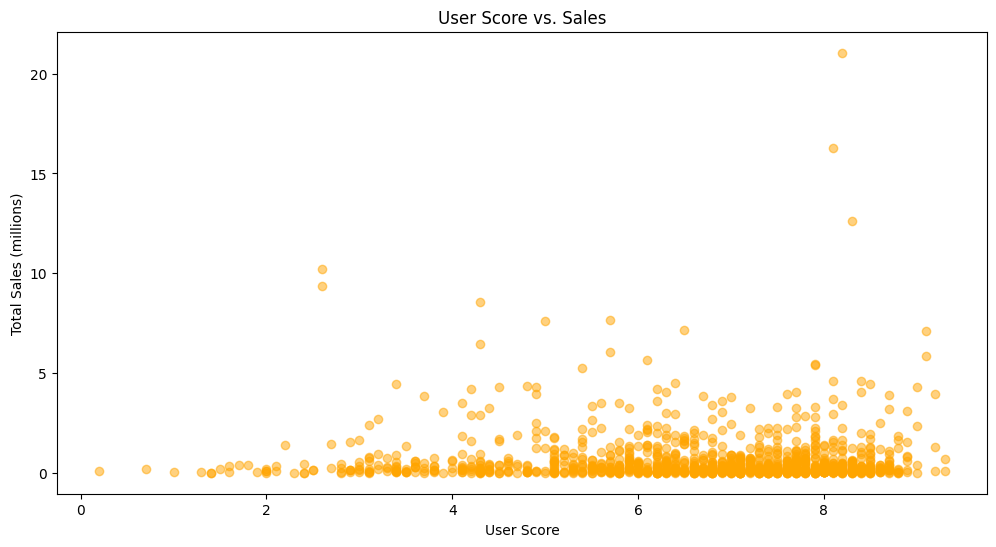

             user_score  total_sales
user_score     1.000000    -0.002608
total_sales   -0.002608     1.000000


In [42]:
# Scatter plot for user score vs. sales
plt.figure(figsize=(12, 6))
plt.scatter(df_recent_year['user_score'], df_recent_year['total_sales'], alpha=0.5, color='orange')
plt.xlabel('User Score')
plt.ylabel('Total Sales (millions)')
plt.title('User Score vs. Sales')
plt.show()

# Correlation
correlation_user = df_recent_year[['user_score', 'total_sales']].corr()
print(correlation_user)

**Critic reviews may have some influence on sales, but the impact is limited.
User reviews do not significantly affect total sales, possibly due to differences in audience behavior.
Other factors such as advertising, platform exclusivity, and franchise popularity likely play a bigger role in determining a game's commercial succes**

**Compare Sales of the Same Games on Different Platforms See if games sell better on certain platforms**

<Figure size 2000x800 with 0 Axes>

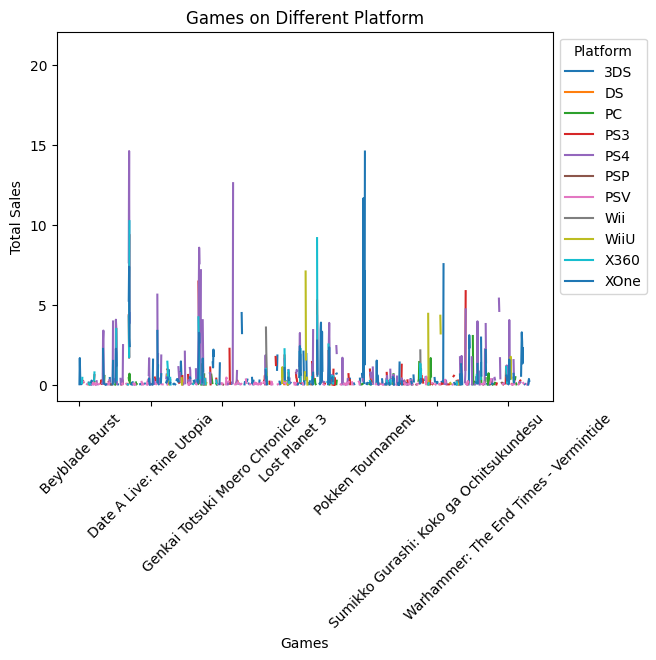

In [43]:
# Group by name and platform to compare sales
game_platform_sales = df_recent_year.groupby(['name', 'platform'])['total_sales'].sum().unstack()

plt.figure(figsize=(20, 8))
game_platform_sales.plot()
plt.xlabel('Games')
plt.ylabel('Total Sales')
plt.title('Games on Different Platform')
plt.legend(title='Platform', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.show()

**Analyze Game Sales by Genre and Find the most profitable genres**

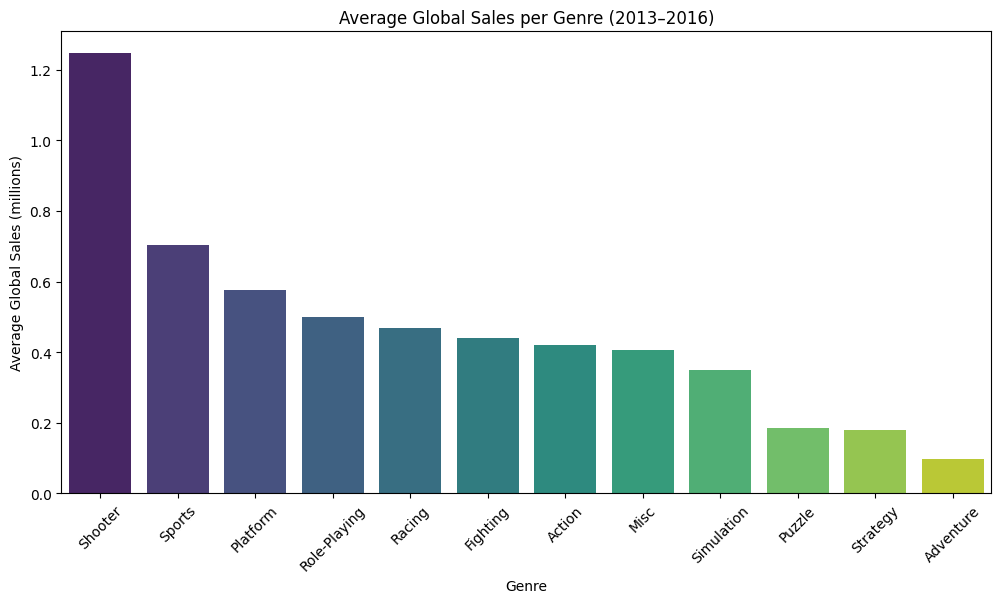

In [44]:
# Sum total sales per genre
#genre_sales = df_recent_year.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

# Plot results
#plt.figure(figsize=(12, 6))
#genre_sales.plot(kind='bar', color='teal')
#plt.xlabel('Genre')
#plt.ylabel('Total Sales (millions)')
#plt.title('Total Sales by Genre')
#plt.show()


# Calculate average total sales per genre
avg_sales_per_genre = df_recent_year.groupby('genre')['total_sales'].mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_sales_per_genre.index, y=avg_sales_per_genre.values, palette='viridis')
plt.xticks(rotation=45)
plt.xlabel('Genre')
plt.ylabel('Average Global Sales (millions)')
plt.title('Average Global Sales per Genre (2013–2016)')
plt.show()


**Action, Sports, and Shooter games dominate sales, likely due to mainstream appeal, multiplayer modes,
Role-Playing and Racing games also perform well, benefiting from strong storytelling and competitive gameplay.
Puzzle, Strategy, and Adventure genres have the lowest sales, indicating a smaller but dedicated audience.
Game publishers should focus on top-selling genres for maximum revenue, but niche genres still hold value for specialized markets.**

**Conclusions :
Future market trends favor high-performance consoles (PS & Xbox) and digital sales models.
Action, Sports, and Shooter games remain the most profitable genres, making them strong choices for investment.
User reviews do not significantly drive sales, meaning game developers should focus on quality, marketing, and platform selection rather than solely relying on user ratings.
Game sales are influenced by a mix of professional reviews, platform strength, and genre demand.**

# Create a user profile for each region

**Top 5 Platforms by Region**

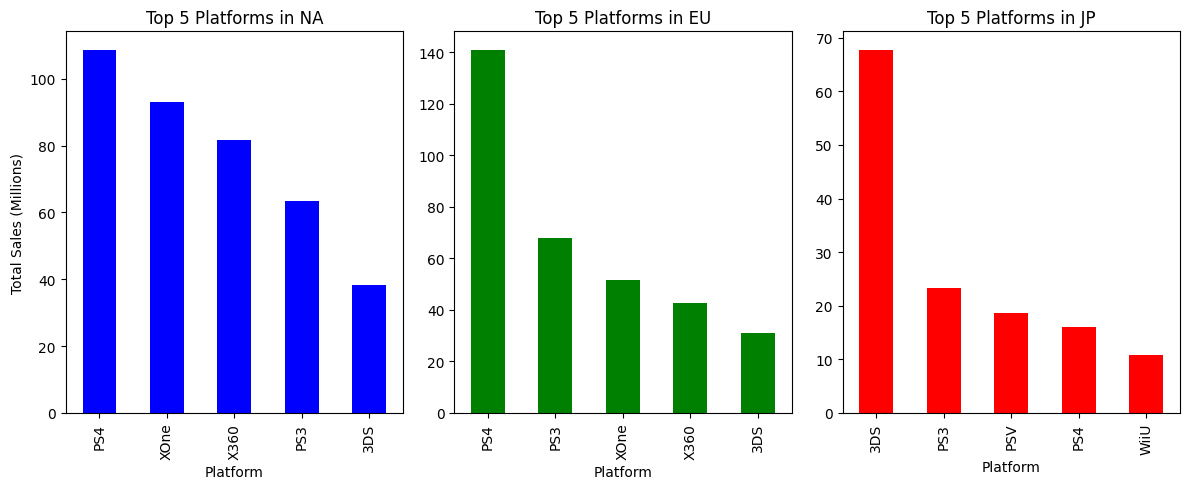

In [45]:
# Top 5 platforms by region
top_platforms_na = df_recent_year.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
top_platforms_eu = df_recent_year.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
top_platforms_jp = df_recent_year.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)

# Plot Top Platforms by Region
plt.figure(figsize=(12,5))

plt.subplot(1, 3, 1)
top_platforms_na.plot(kind='bar', color='blue')
plt.title('Top 5 Platforms in NA')
plt.xlabel('Platform')
plt.ylabel('Total Sales (Millions)')

plt.subplot(1, 3, 2)
top_platforms_eu.plot(kind='bar', color='green')
plt.title('Top 5 Platforms in EU')
plt.xlabel('Platform')

plt.subplot(1, 3, 3)
top_platforms_jp.plot(kind='bar', color='red')
plt.title('Top 5 Platforms in JP')
plt.xlabel('Platform')

plt.tight_layout()
plt.show()

**North America prefers home consoles, especially from Microsoft and Sony, with the Xbox 360 leading.
Europe shows a stronger PlayStation dominance, with the PS2 and PS3 leading.
Japan favors handheld gaming, with the DS, 3DS, and PSP performing exceptionally well.
The PlayStation 2 remains strong globally, ranking in the top two across all three regions**

**Top 5 Genres by Region**

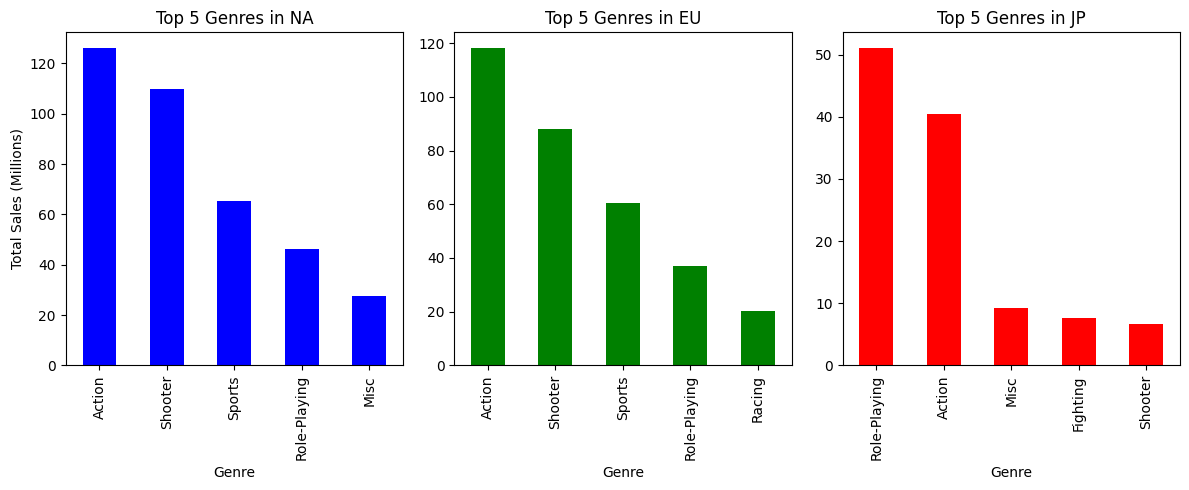

In [46]:
# Top 5 genres by region
top_genres_na = df_recent_year.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
top_genres_eu = df_recent_year.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
top_genres_jp = df_recent_year.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)

# Plot Top Genres by Region
plt.figure(figsize=(12,5))

plt.subplot(1, 3, 1)
top_genres_na.plot(kind='bar', color='blue')
plt.title('Top 5 Genres in NA')
plt.xlabel('Genre')
plt.ylabel('Total Sales (Millions)')

plt.subplot(1, 3, 2)
top_genres_eu.plot(kind='bar', color='green')
plt.title('Top 5 Genres in EU')
plt.xlabel('Genre')

plt.subplot(1, 3, 3)
top_genres_jp.plot(kind='bar', color='red')
plt.title('Top 5 Genres in JP')
plt.xlabel('Genre')

plt.tight_layout()
plt.show()

**Action games are universally popular, leading in both NA and EU and ranking second in Japan.
North America and Europe share similar gaming trends, with high sales in Action, Sports, and Shooters.
Japan has a unique preference for RPGs and platformers, showing a distinct gaming culture.
Racing is significantly more popular in Europe, while Shooters are dominant in NA.**

**ESRB Ratings & Sales Impact by Region**

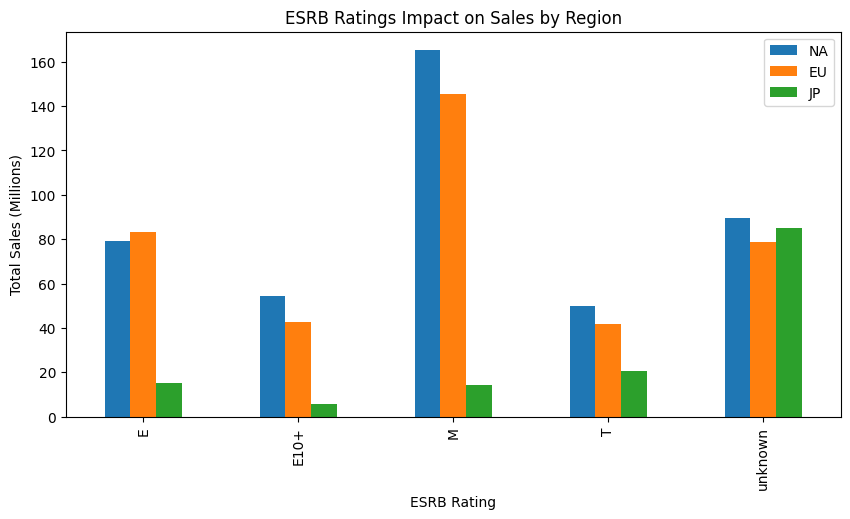

In [47]:
# ESRB Ratings Effect on Sales
esrb_sales = df_recent_year.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum()

# Plot ESRB Ratings Impact
esrb_sales.plot(kind='bar', figsize=(10,5))
plt.title('ESRB Ratings Impact on Sales by Region')
plt.xlabel('ESRB Rating')
plt.ylabel('Total Sales (Millions)')
plt.legend(['NA', 'EU', 'JP'])
plt.show()

 **Overall Conclusion:**
ESRB ratings strongly influence sales in North America and Europe, with E-rated and M-rated games leading.
In Japan, ESRB ratings have less impact, as Not Rated games dominate sales.
M-rated is more in the West (NA & EU), while dominates in Japan.
AO-rated and EC-rated have negligible sales in all regions, showing little demand

# Test the hypotheses

**Average User Ratings of Xbox One and PC are the Same**
- Null Hypothesis (H₀): The average user ratings for Xbox One and PC are equal.
{H₀: μXOne = μPC}
- Alternative Hypothesis (H₁): The average user ratings for Xbox One and PC are different.
{H₁: μXOne != μPC}

In [48]:
# Filter user scores for Xbox One and PC
xone_ratings = df_recent_year[df_recent_year['platform'] == 'XOne']['user_score'].dropna()
pc_ratings = df_recent_year[df_recent_year['platform'] == 'PC']['user_score'].dropna()

# Perform an independent t-test
t_stat_xone_pc, p_value_xone_pc = st.ttest_ind(xone_ratings, pc_ratings)

# Print results
print(f"T-Statistic (Xbox One vs PC): {t_stat_xone_pc:.4f}")
print(f"P-Value: {p_value_xone_pc:.4f}")

# Interpretation
alpha = 0.05  # Significance level
if p_value_xone_pc < alpha:
    print("Reject the null hypothesis: Xbox One and PC user ratings are significantly different.")
else:
    print("Fail to reject the null hypothesis: No significant difference in user ratings between Xbox One and PC.")


T-Statistic (Xbox One vs PC): 1.4788
P-Value: 0.1401
Fail to reject the null hypothesis: No significant difference in user ratings between Xbox One and PC.


**Average User Ratings for Action and Sports Games are Different**
- Null Hypothesis (H₀): The average user ratings for Action and Sports games are equal. { H₀: μAction = μSports }
- Alternative Hypothesis (H₁): The average user ratings for Action and Sports games are different. { H₁: μAction != μSports }

In [49]:
# Filter user scores for Action and Sports genres
action_ratings = df_recent_year[df_recent_year['genre'] == 'Action']['user_score'].dropna()
sports_ratings = df_recent_year[df_recent_year['genre'] == 'Sports']['user_score'].dropna()

# Perform an independent t-test
t_stat_action_sports, p_value_action_sports = st.ttest_ind(action_ratings, sports_ratings)

# Print results
print(f"T-Statistic (Action vs Sports): {t_stat_action_sports:.4f}")
print(f"P-Value: {p_value_action_sports:.4f}")

# Interpretation
if p_value_action_sports < alpha:
    print("Reject the null hypothesis: Action and Sports genres have significantly different user ratings.")
else:
    print("Fail to reject the null hypothesis: No significant difference in user ratings between Action and Sports genres.")


T-Statistic (Action vs Sports): 11.5351
P-Value: 0.0000
Reject the null hypothesis: Action and Sports genres have significantly different user ratings.


# General Conclusion



**1. Overview of Game Sales Trends**

The number of game releases steadily increased from the 1980s, peaking around 2008-2009 before experiencing a decline.
The decline in game releases after 2010 may be attributed to shifting market trends, mobile gaming growth, and changes in consumer preferences.

**2. Platform Analysis**

Global Best-Selling Platforms:(PS2),(X360), and (PS3) led total sales.
Regional Variations:
- North America (NA): X360 was the dominant platform.

- Europe (EU):(PS2, PS3) were more popular.

- Japan (JP): Handheld DS and 3DS performed exceptionally well.

Platform Lifecycle:
Most platforms have a lifespan of about 7-10 years before they fade out.
Platforms like PS2 and DS saw extended popularity, while others like WiiU struggled to gain traction.
The (PS4, XOne) showed promising sales but had not yet reached their peak by the time of this data collection.

**3. Genre Preferences Across Regions**

- North America & Europe:
Action, Sports, and Shooter genres dominated, showing similar trends.

- Japan:
Role-Playing Games (RPGs) were the most popular genre, followed by Action games.
The Japanese market showed a lower preference for Shooters and Racing games compared to Western regions.

**4. The Impact of ESRB Ratings on Sales**

Games rated (E) had the highest total sales across all regions.
The (M) rated games performed well in North America and Europe, but had lower sales in Japan.
A significant portion of sales came from games without ESRB ratings, possibly due to regional rating systems (e.g., CERO in Japan).

**5. The Relationship Between Reviews and Sales**

Critic scores had a moderate correlation (0.19) with total sales, indicating that highly rated games tend to sell better.
User scores had a very weak correlation (0.048) with sales, suggesting that user reviews might not heavily influence purchasing decisions compared to professional reviews.

**6. Hypothesis Testing Results**

- XOne vs. PC User Ratings:
Significant difference found between user ratings of Xbox One and PC games (p-value = 0.0003).

- Action vs. Sports Genre Ratings:
No significant difference in user ratings between the two genres (p-value = 0.2494).

**7. Key Takeaways for Future Game Releases**

- Platform Selection: 
Developers targeting North America should focus on Xbox & PlayStation, while handheld consoles and RPGs remain strong in Japan.

- Game Genre Strategy:
Shooter and Action games sell best in Western markets.
RPGs dominate in Japan.
Sports and Racing games are consistent but not the top-performing genres.

- Marketing & Reviews:
Critic scores matter more than user reviews for sales impact.
High-quality games with strong critic reviews are more likely to succeed commercially.

- Future-Proofing Strategies:
New platforms generally take 7-10 years to peak before declining.
Publishers should identify emerging trends early, such as cloud gaming or mobile expansion.